In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/Iris.csv')

In [ ]:
dataset=dataset.drop(['Id'],axis=1)

In [ ]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = dataset.iloc[:,:4].values
Y = dataset['Species'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=82)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'linear', random_state = 0)
svcclassifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = svcclassifier.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']


In [ ]:
y_compare = np.vstack((Y_test,y_pred)).T

y_compare[:5,:]

array([['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa']], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]


In [ ]:
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
kernelLinearAccuracy = corrPred/(cm.sum())
print ('Accuracy of the SVC Clasification is: ', corrPred/(cm.sum()))

Correct predictions:  29
False predictions 1
Accuracy of the SVC Clasification is:  0.9666666666666667


Accuracy Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


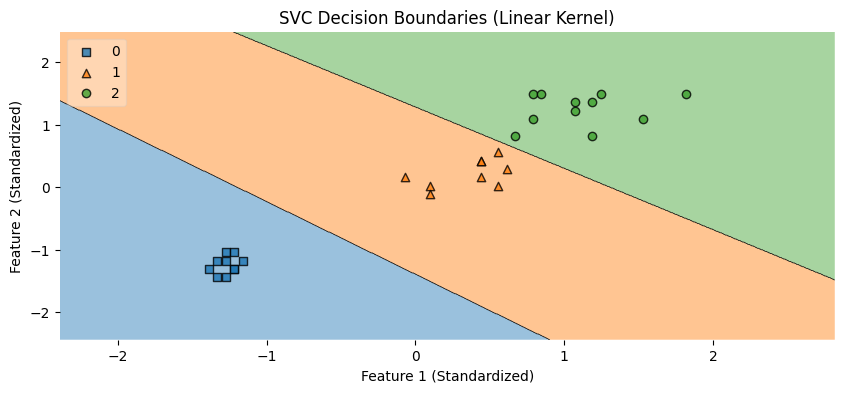

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, [2, 3]]  # Using only two features for simplicity
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Train the Support Vector Classifier with a linear kernel
svcclassifier = SVC(kernel='linear', random_state=0)
svcclassifier.fit(X_train_std, y_train)

# Convert the target variable y_test to integer type
y_test_int = pd.Categorical(y_test).codes

# Make predictions
y_pred = svcclassifier.predict(X_test_std)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test_int, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Calculate and print confusion matrix
cm = confusion_matrix(y_test_int, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the decision boundary
plt.figure(figsize=(10, 4))
plot_decision_regions(X_test_std, y_test_int, clf=svcclassifier, legend=2)
plt.title('SVC Decision Boundaries (Linear Kernel)')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()
